In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sb
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import codecs

In [2]:
import pandas as pd
data = pd.read_json('../data.json') #Lee el json y le hace la transpuesta.
#title ,title_orig, price, retail_price, units_sold, rating, rating_count, product_url, product_picture, product_id, theme, tags, product_color, product_variation_size_id, shipping_option_price
data.columns = ['Brand', 'title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'rating', 'rating_count', 'product_url', 'product_picture',
       'product_id', 'theme', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price', 'idBusiness']


In [3]:
filteredProducts =  (data.query("idBusiness == 'sewehzdubsqk'"))
# result = filteredProducts.to_json(orient='index') #Turn in to json data
# #open text file
# text_file = open("C:/Users/Usuario/Desktop/Juan/Universidad/Tesis/firebaseDATA/data.json", "w")
# #write string to file
# text_file.write(result)
# #close file
# text_file.close()
print(len(filteredProducts))

98


In [4]:
arrayProducts = {}
#title ,title_orig, price, retail_price, units_sold, rating, rating_count, product_url, product_picture, product_id, theme, tags, product_color, product_variation_size_id, shipping_option_price
data.columns = ['Brand', 'title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'rating', 'rating_count', 'product_url', 'product_picture',
       'product_id', 'theme', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price', 'idBusiness']
for index, row in filteredProducts.iterrows():
    dictVals = {
        "Brand" : row['Brand'],
        "title" : row['title'],
        "title_orig" : row['title_orig'],
        "price": row['price'],
        "retail_price"  : row['retail_price'],   
        "units_sold": row['units_sold'],
        "rating": row['rating'],
        "rating_count": row['rating_count'],
        "product_url": row['product_url'],
        "product_picture": row['product_picture'],
        "product_id": row['product_id'],
        "theme": row['theme'],
        "tags": row['tags'],
        "product_color" : row['product_color'],
        "product_variation_size_id": row['product_variation_size_id'],
        "shipping_option_price": row['shipping_option_price'],
        "idBusiness": row['idBusiness']
    }
    arrayProducts[row['product_id']] = dictVals




In [5]:
idBussiness = {}
for item in data['idBusiness']:
    if item in idBussiness:
        idBussiness[item] += 1
    else:
        idBussiness[item] = 1
idBussiness

{'dumijjxgdkhk': 76,
 'bbhrwulprtjg': 75,
 'wptzfozwceva': 66,
 'cwcofnbctuio': 71,
 'pehabikjnilf': 58,
 'oxrvrhfioofw': 96,
 'gjrwqigrslac': 70,
 'thvcegjoprig': 70,
 'sewehzdubsqk': 98,
 'tiyqrehctiub': 78,
 'jkveiysoosoa': 75,
 'xpwowxmfgufw': 79,
 'vedzlhcmcbiu': 79,
 'xpfstgmwmpzh': 66,
 'pkrczvjwcwmo': 75,
 'wzxtmunjkiyv': 89,
 'vktunkhdirsc': 60,
 'kynbhlffmupr': 71,
 'bwbivvjshioe': 87,
 'vvwqhmphwcfu': 61}

In [106]:

import codecs
import json
data = json.dumps(arrayProducts)

# data = df1FinalVer.to_json(orient='index') #T
# # data
# path = "C:/Users/Usuario/Desktop/Juan/Universidad/Tesis/firebaseDATA/data.json"
file = codecs.open("C:/Users/Usuario/Desktop/Juan/Universidad/Tesis/firebaseDATA/data.json", "w", "utf-8")
file.write(data)
file.close()
# b = arrayProducts.tolist()
# json.dump(b, codecs.open(path, 'w', encoding='utf-8'), 
#           separators=(',', ':'), 
#           sort_keys=True, 
#           indent=4) ### this saves the array in .json format

In [6]:
numbers = []
def setIndexToRow():
    for i in range(len(data)):
        numbers.append(i)
    data['index'] = numbers
setIndexToRow()
data['index']


0          0
1          1
2          2
3          3
4          4
        ... 
1495    1495
1496    1496
1497    1497
1498    1498
1499    1499
Name: index, Length: 1500, dtype: int64

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


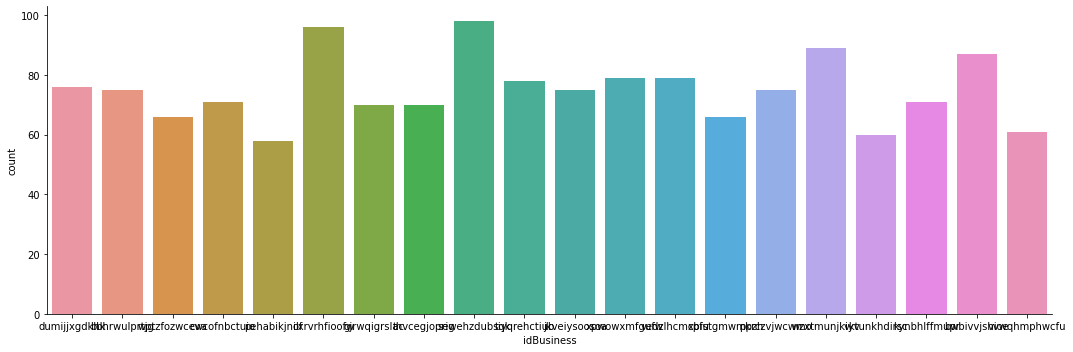

In [7]:
sb.factorplot('idBusiness',data=data,kind="count", aspect=3) #Grafica de cantidad de productos por cada tienda.

In [7]:
data.columns

Index(['Brand', 'title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'rating', 'rating_count', 'product_url', 'product_picture',
       'product_id', 'theme', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price', 'idBusiness',
       'index'],
      dtype='object')

Workign with brands

In [8]:
brands = {}
#Obtener todas las marcas disponibles
for index, row in data.iterrows():
    if row['Brand'] in brands:
        pass
    else:
        brands[row['Brand']] = row["Brand"]
print(len(brands.keys()))

86


In [9]:
arrayBrands = brands.keys() 
print(len(arrayBrands))

86


In [10]:
def binaryList(brandInput):
    arr = []
    for brand in arrayBrands:
        if(brandInput == brand):
            arr.append(1)
        else:
            arr.append(0)
    return arr


Working with colors

In [11]:
data['brand_bin'] = data['Brand'].apply(lambda x: binaryList(x))
data['brand_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: brand_bin, dtype: object

In [12]:
colors = {}
#Obtener todas las marcas disponibles
for index, row in data.iterrows():
    if row['product_color'] in colors:
        colors[row['product_color']] =colors[row['product_color']] + 1
    else:
        colors[row['product_color']] = 1
arrayColors = colors.keys()


In [13]:
print(len(arrayColors))

101


In [14]:
def binaryListColor(colorInput):
    arr = []
    for color in arrayColors:
        if(colorInput == color):
            arr.append(1)
        else:
            arr.append(0)
    return arr

In [15]:
data['color_bin'] = data['product_color'].apply(lambda x: binaryListColor(x))
data['color_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: color_bin, dtype: object

Working with tags


In [16]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
wordsSeries = data['tags']
wordsSeries

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1495    Summer,Plus Size,Necks,chiffon,chiffon dress,D...
1496    Summer,Plus Size,Fashion,Sleeve,Tops,Loose,sho...
1497    Sterling,Summer,Fashion,Rose Gold Ring,gold,Si...
1498    Mini,Strapless Dress,Fashion,Summer,Tube top,T...
1499    Summer,Fashion,Lace,pants,fashion pants,summer...
Name: tags, Length: 1500, dtype: object

In [18]:
def splitElement(element):
    arr = element.split(",")
    return arr

In [19]:
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
#words = data['tags'].dropna().apply(nltk.word_tokenize)
wordsByRow = data['tags'].dropna().apply(lambda x: splitElement(x))
word=[]
# for i in words:
# word.extend(i)
# word=pd.Series(word)
# word=([i for i in word.str.lower() if i not in stop_words])
# wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)

In [20]:
allTags = {}
for  arrayWords in wordsByRow:
    for word in arrayWords:
        if word in allTags:
            allTags[word] = allTags[word] + 1
        else:
            allTags[word] = 1
allTagsArray = allTags.keys()



In [21]:
allTags = []
for tag in allTagsArray:
    allTags.append(tag)
print(len(allTags))

2555


In [17]:
wordsByRow

0       [Summer, Fashion, womenunderwearsuit, printedp...
1       [Mini, womens dresses, Summer, Patchwork, fash...
2       [Summer, cardigan, women beachwear, chiffon, S...
3       [Summer, Shorts, Cotton, Cotton T Shirt, Sleev...
4       [Summer, Plus Size, Lace, Casual pants, Bottom...
                              ...                        
1495    [Summer, Plus Size, Necks, chiffon, chiffon dr...
1496    [Summer, Plus Size, Fashion, Sleeve, Tops, Loo...
1497    [Sterling, Summer, Fashion, Rose Gold Ring, go...
1498    [Mini, Strapless Dress, Fashion, Summer, Tube ...
1499    [Summer, Fashion, Lace, pants, fashion pants, ...
Name: tags, Length: 1500, dtype: object

In [22]:
totalArr = []
for row in wordsByRow:
    arr = np.empty(len(allTagsArray))
    arr.fill(0)
    for word in row:
        for tagArrayWord in allTags:
            if (word == tagArrayWord):
                arr[allTags.index(tagArrayWord)] = 1
    totalArr.append(arr)
totalArr



[array([1., 1., 1., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 

In [132]:
len(totalArr)

1500

In [23]:
data['bin_keywords'] = totalArr

In [24]:
data['product_id'].head()

0    5e9ae51d43d6a96e303acdb0
1    58940d436a0d3d5da4e95a38
2    5ea10e2c617580260d55310a
3    5cedf17ad1d44c52c59e4aca
4    5ebf5819ebac372b070b0e70
Name: product_id, dtype: object

In [25]:
from scipy import spatial
def Similarity(title1, title2):
    a = data.iloc[title1]
    b = data.iloc[title2]
    brandsA = a['brand_bin']
    brandsB = b['brand_bin']
    brandDistance = spatial.distance.cosine(brandsA, brandsB)
    
    colorA = a['color_bin']
    colorB = b['color_bin']
    colorDistance = spatial.distance.cosine(colorA, colorB)
    
    keyWordsA = a['bin_keywords']
    keyWordsB = b['bin_keywords']

    keyWordsDistance = spatial.distance.cosine(keyWordsA, keyWordsB)

    return brandDistance  + colorDistance + keyWordsDistance



In [32]:
import operator
def predict_score():
    # name = input('Enter a product title: ')
    #name = "Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL"
    #print(name)
    i = data[data['product_id'] == "5cedf17ad1d44c52c59e4aca"]
    print(len(i))
    if((len(i)) > 1):
        index = (i.iloc[0]['index'])
    else:
        index = (i['index'])

    new_product = data.iloc[int(index)].to_frame().T
    
#i = data[data['product_id'] == "58940d436a0d3d5da4e95a38"]
    #new_product = data[data['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected product: ',new_product.title.values[0])

    def getNeighbors(baseProduct, K):
        print("HOLA")
        distances = []
        for index, product in data.iterrows():
            if product['index'] != baseProduct['index'].values[0]:
                dist = Similarity(baseProduct['index'].values[0], product['index'])
                distances.append((product['index'], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_product, K)

    print('\nRecommended products: \n')
    for neighbor in neighbors:
        print(neighbor)
        #print(data.iloc[neighbor[0]]['product_picture'])
        # avgRating = avgRating+ data.iloc[neighbor[0]][2]
        # print( data.iloc[neighbor[0]][0]+" | Genres: "+str(data.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(data.iloc[neighbor[0]][2]))
    
    # print('\n')
    # avgRating = avgRating/K 
    # print('The predicted rating for %s is: %f' %(new_product['title'].values[0],avgRating))
    # print('The actual rating for %s is %f' %(new_product['title'].values[0],new_product['vote_average']))

In [33]:
predict_score()
# data.iloc[6]

0


TypeError: cannot convert the series to <class 'int'>

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


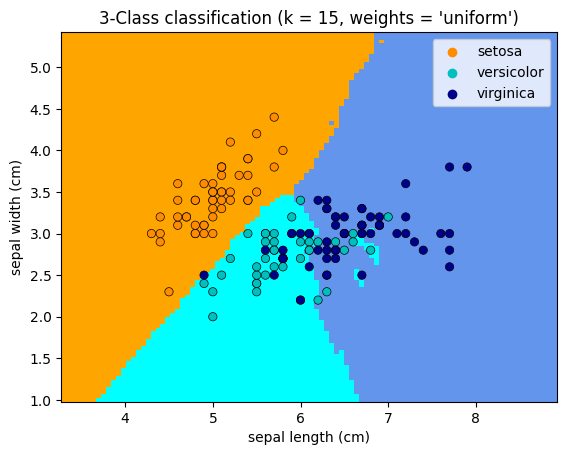

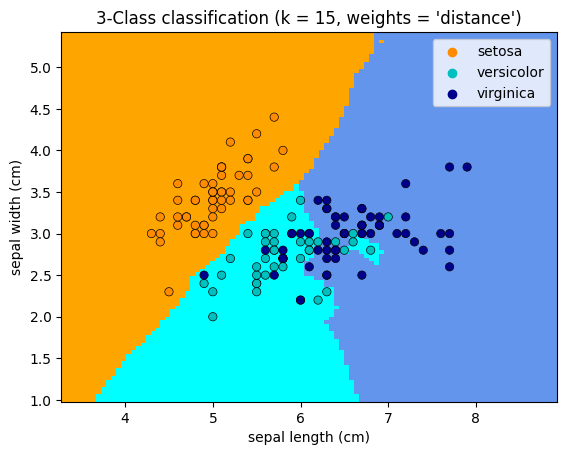

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()